In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.sparse as sp
import scipy.sparse.linalg as spla

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'figure.figsize': (6, 4),
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'font.size': 12,
    'axes.spines.top': False,
    'axes.spines.right': False
})

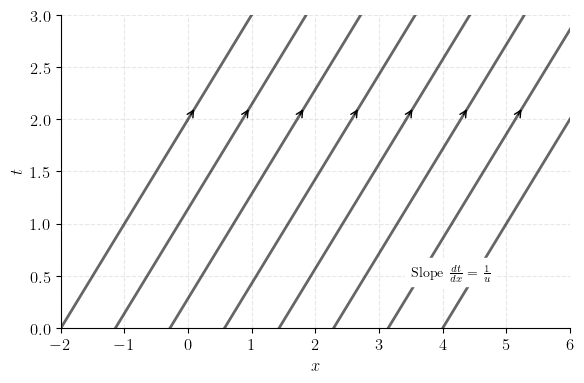

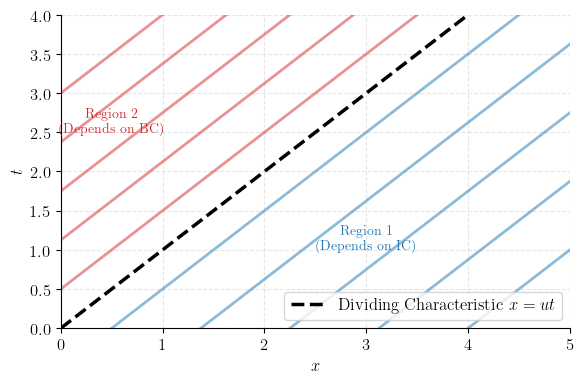

In [10]:
def plot_infinite_domain():
    fig, ax = plt.subplots()
    
    u = 1.0
    t = np.linspace(0, 4, 100)
    
    # generate parallel characteristic lines
    # x = ut + x0  =>  x0 = x - ut
    x_starts = np.linspace(-2, 4, 8)
    
    for x0 in x_starts:
        x = u * t + x0
        ax.plot(x, t, 'k-', alpha=0.6)
        
        mid_idx = len(t) // 2
        ax.annotate('', xy=(x[mid_idx]+0.1, t[mid_idx]+0.1), 
                    xytext=(x[mid_idx], t[mid_idx]),
                    arrowprops=dict(arrowstyle='->', color='k'))

    # ax.set_title("Method of Characteristics (Infinite Domain)")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$t$")
    ax.set_xlim(-2, 6)
    ax.set_ylim(0, 3)
    
    ax.text(3.5, 0.5, r"Slope $\frac{dt}{dx} = \frac{1}{u}$", fontsize=10, backgroundcolor='white')
    
    plt.tight_layout()
    plt.savefig("../../../figs/pde/infinite_domain.pdf", bbox_inches='tight', transparent=True)

    plt.show()

def plot_semi_infinite_domain():
    fig, ax = plt.subplots()
    
    u = 1.0
    max_t = 4
    t = np.linspace(0, max_t, 100)
    
    x_divide = u * t
    ax.plot(x_divide, t, 'k--', linewidth=2.5, label=r'Dividing Characteristic $x=ut$')
    
    x_ic_starts = np.linspace(0.5, 4, 5)
    for x0 in x_ic_starts:
        x = u * t + x0
        ax.plot(x, t, color='#1f77b4', alpha=0.5)
        
    t_bc_starts = np.linspace(0.5, 3, 5)
    for t0 in t_bc_starts:
        # we only plot where x > 0
        t_segment = np.linspace(t0, max_t, 50)
        x_segment = u * (t_segment - t0)
        ax.plot(x_segment, t_segment, color='#d62728', alpha=0.5)

    ax.text(3, 1.0, "Region 1\n(Depends on IC)", color='#1f77b4', 
            ha='center', fontsize=10, fontweight='bold')
    ax.text(0.5, 2.5, "Region 2\n(Depends on BC)", color='#d62728', 
            ha='center', fontsize=10, fontweight='bold')

    # ax.set_title("Semi-Infinite Domain")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$t$")
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 4)
    ax.legend(loc='lower right')
    
    plt.tight_layout()
    plt.savefig("../../../figs/pde/semi_infinite_domain.pdf", bbox_inches='tight', transparent=True)
    plt.show()


plot_infinite_domain()
plot_semi_infinite_domain()